In [1]:
import os
import wfdb
import numpy as np
import matplotlib.pyplot as plt

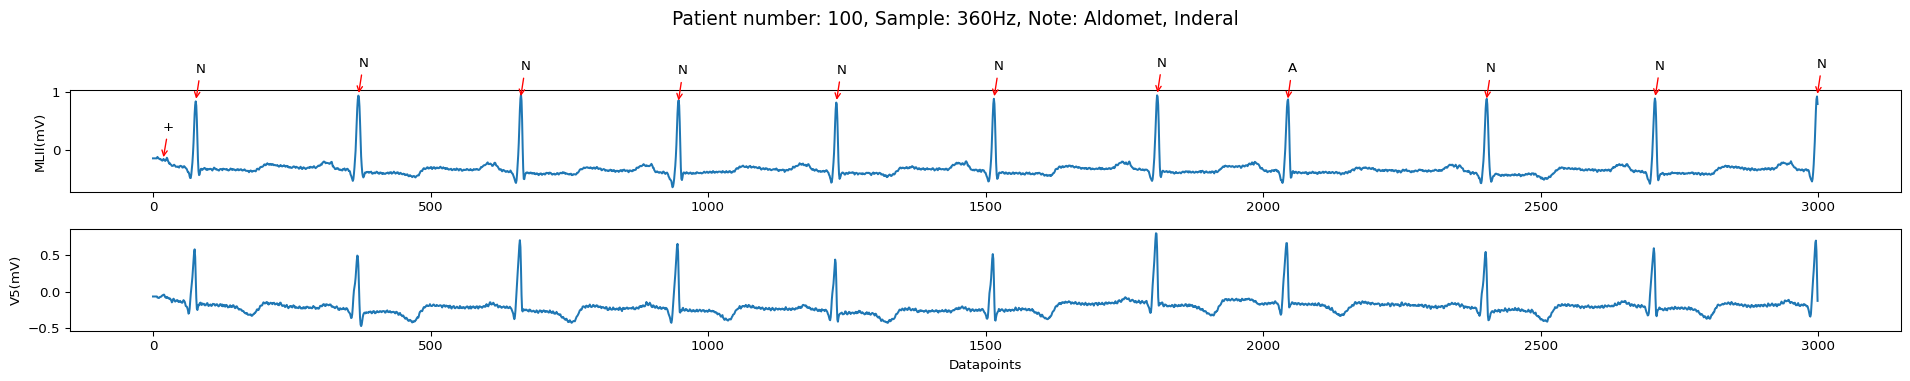

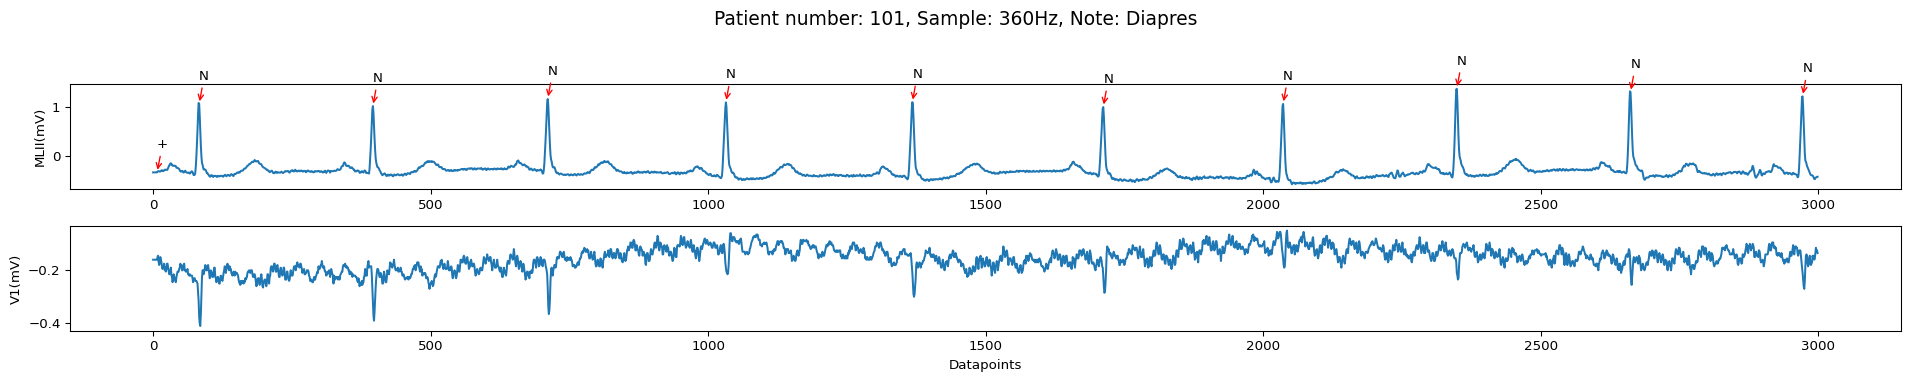

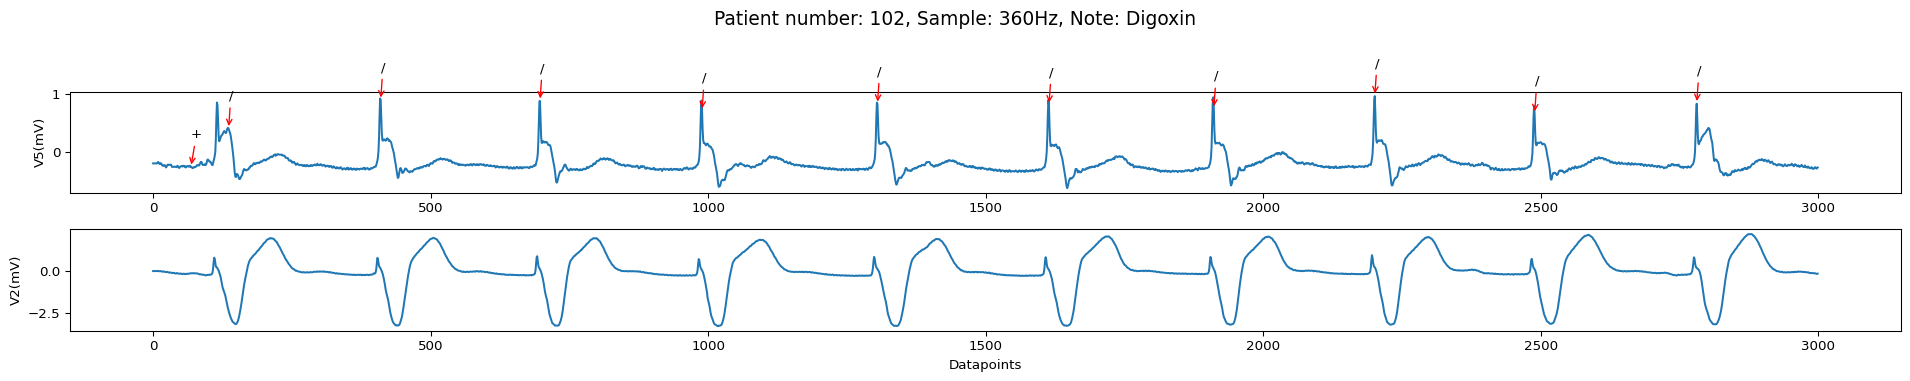

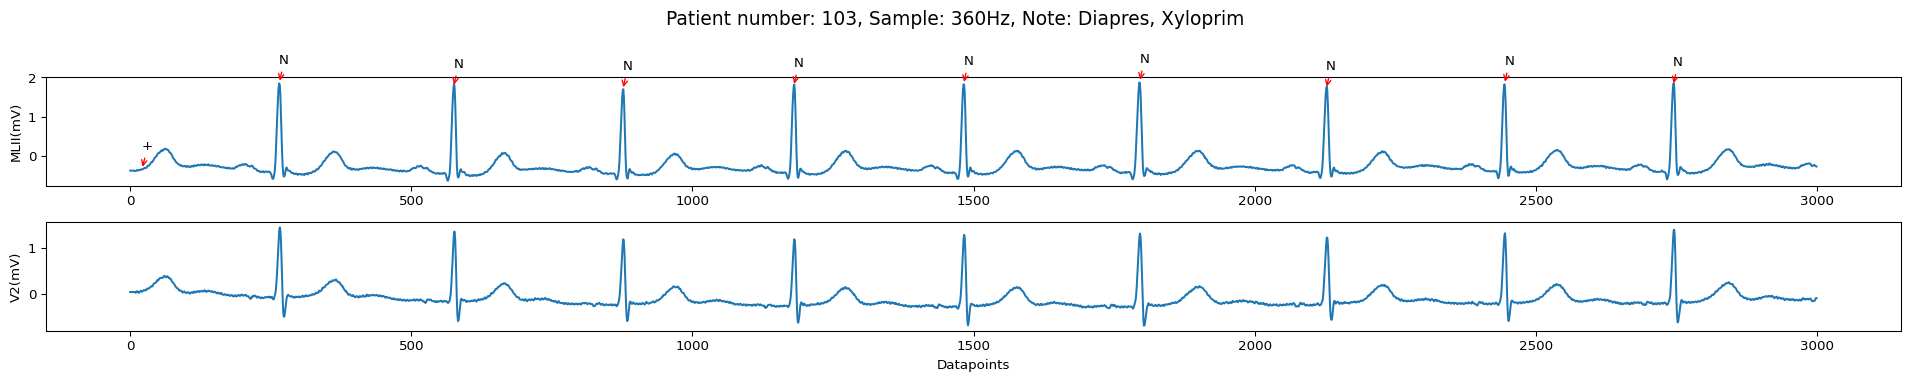

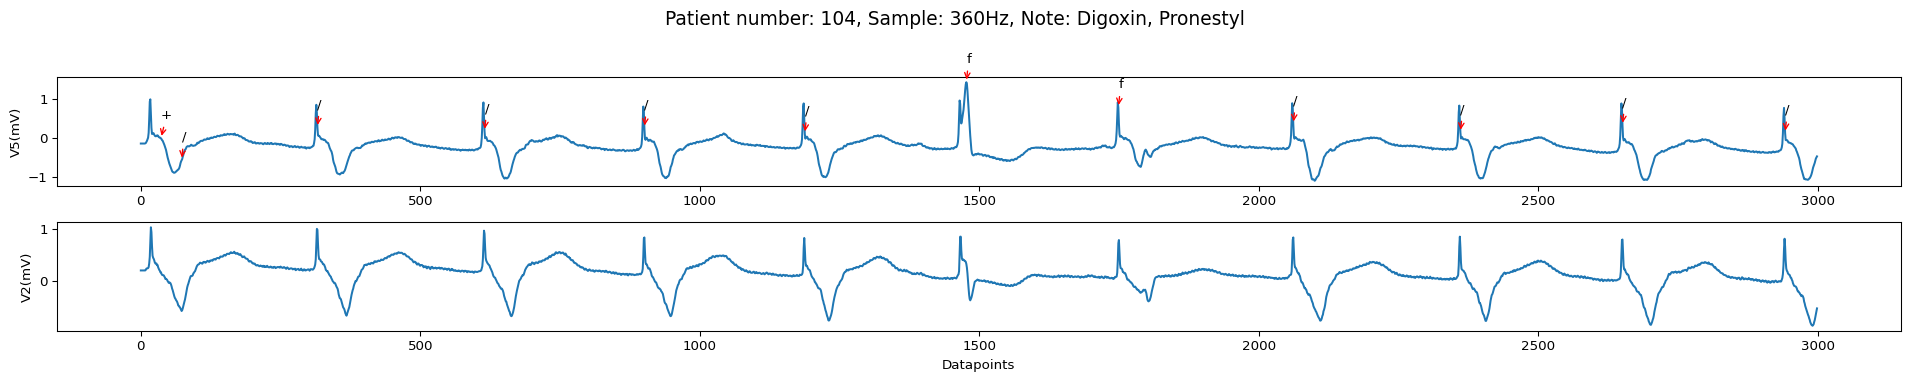

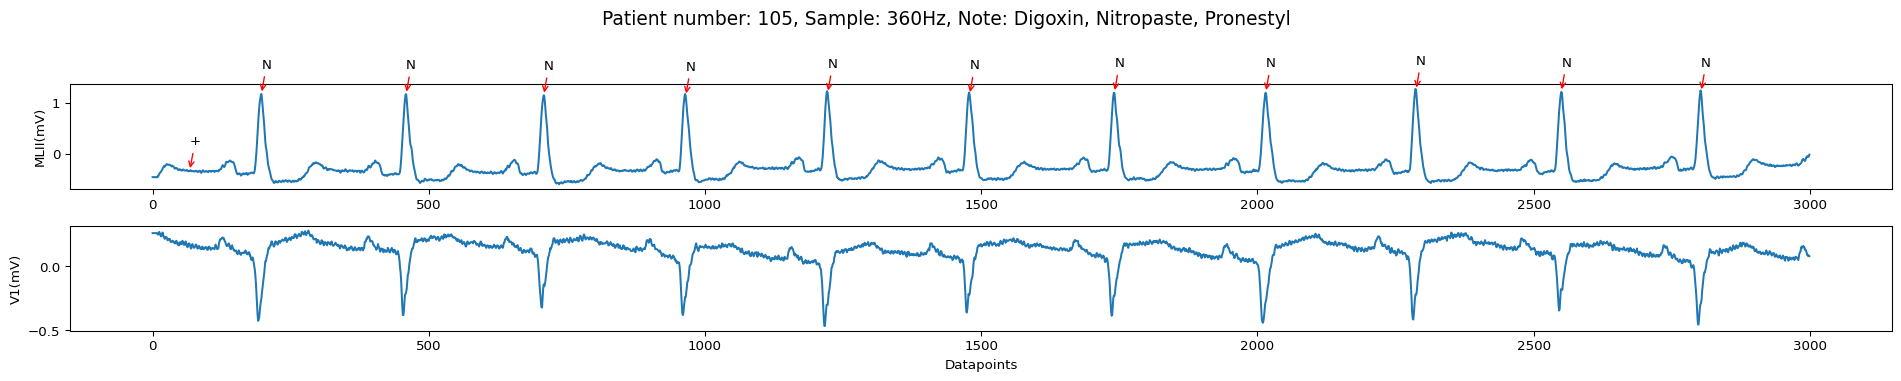

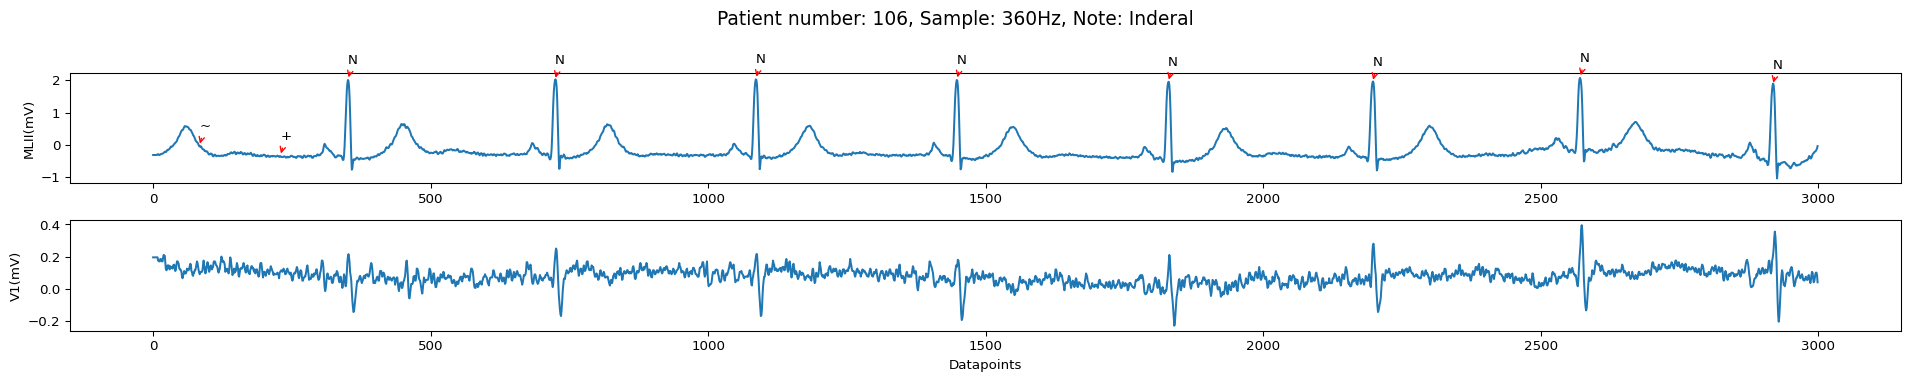

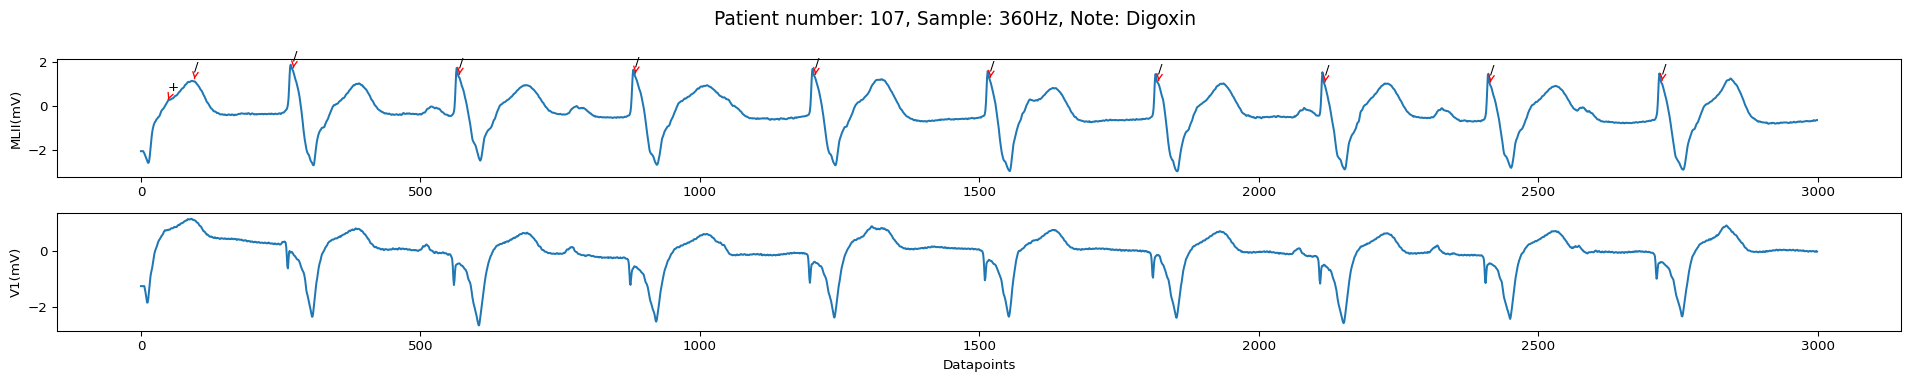

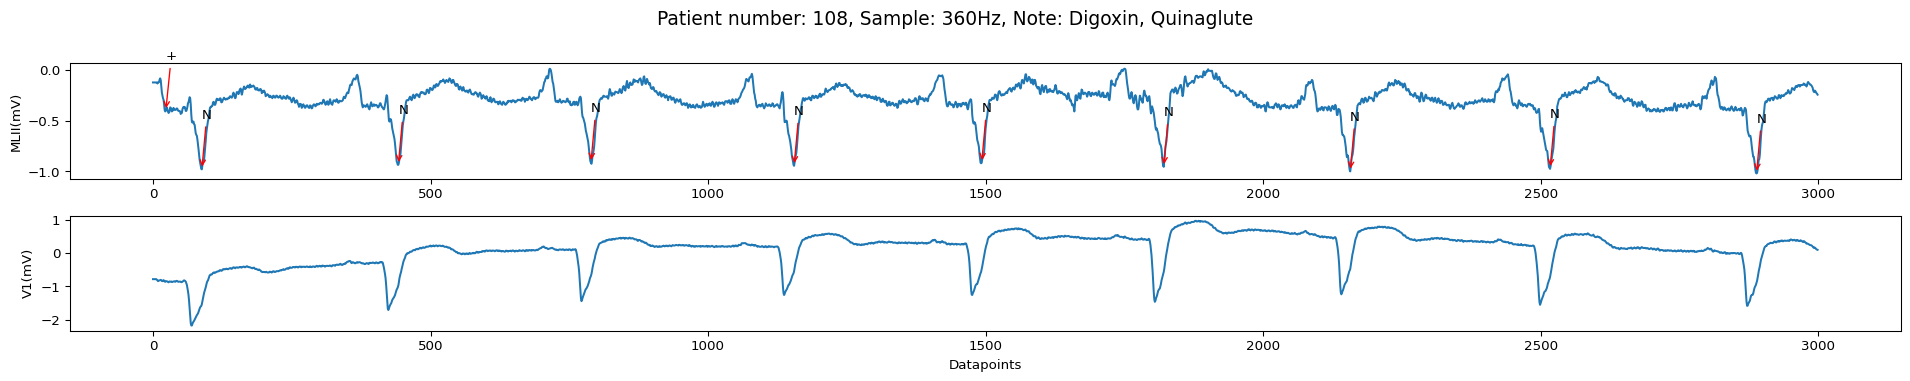

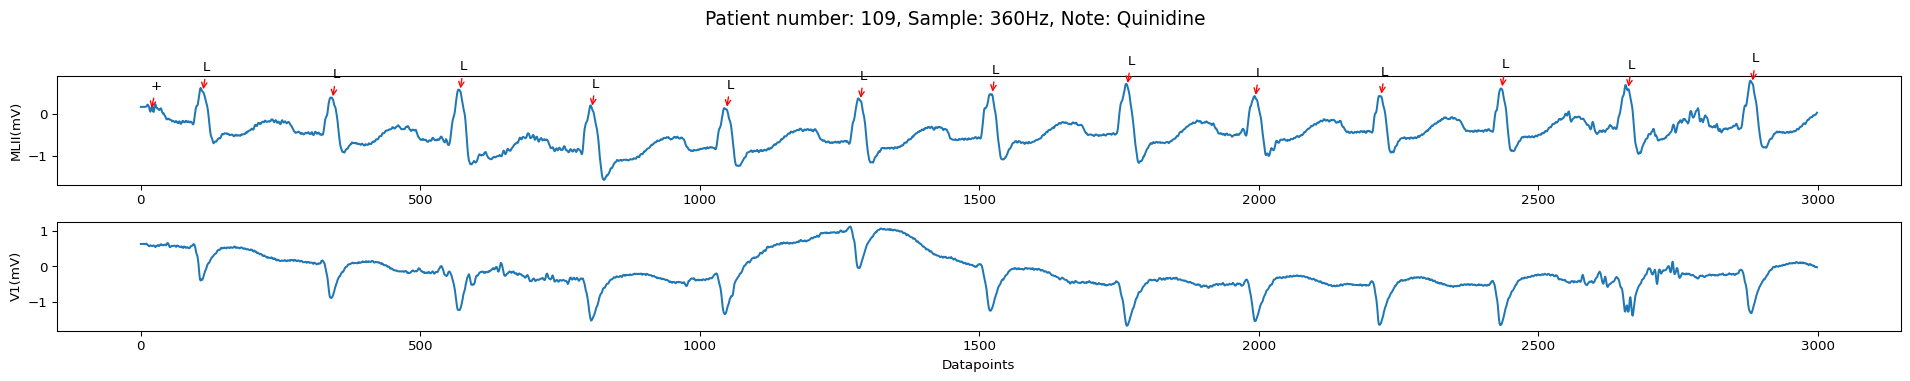

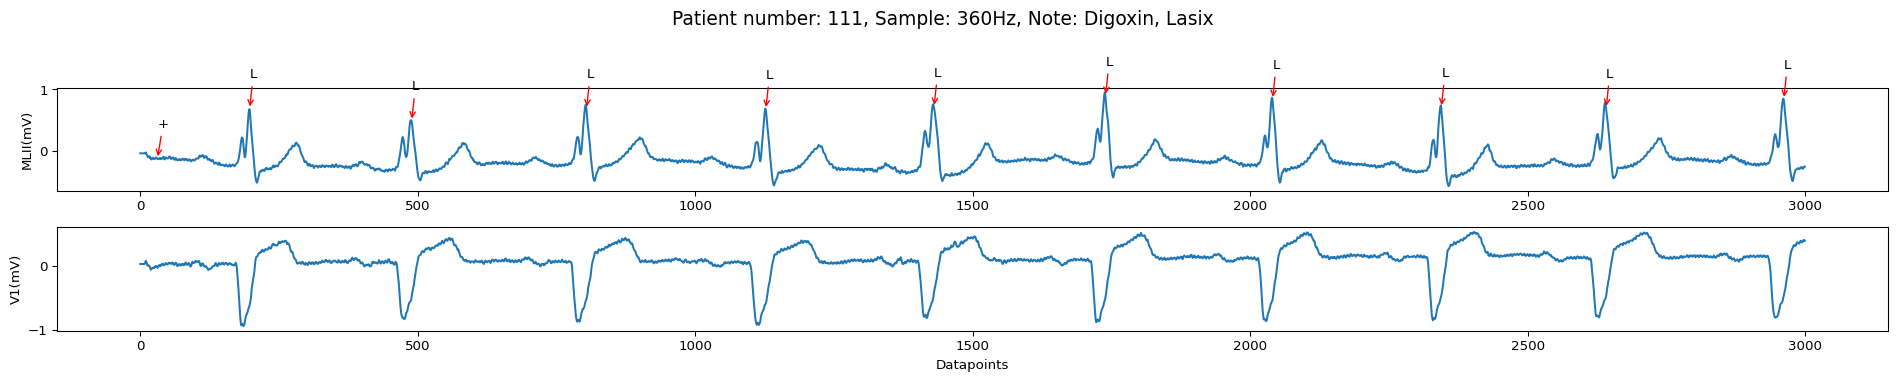

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb

# Load data and annotation
data_path = '/Users/jinyanwei/Desktop/BP_Model/Data/mitdb/'
patient_list = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111]
for patient_num in patient_list:
    record = wfdb.rdsamp(data_path + str(patient_num), sampto=3000) 
    #record[0]: ecg data
    #recore[1]: {'fs': 360, 'sig_len': 3000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V5'], 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}
    annotation = wfdb.rdann(data_path + str(patient_num), 'atr', sampto=3000)
    # Extract peak locations and labels from the annotation
    peak_locations = annotation.sample #[18, 77, 370, 662, 946, 1231, 1515, 1809, 2044, 2402, 2706, 2998]
    peak_labels = annotation.symbol #['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N']

    fig, ax = plt.subplots(nrows=2, figsize=(20,4), dpi=96)
    I = record[0][:, 0]
    II = record[0][:, 1]

    ax[0].plot(I)
    ax[1].plot(II)
    ax[0].set_ylabel(f'{record[1]["sig_name"][0]}(mV)')
    ax[1].set_xlabel('Datapoints')
    ax[1].set_ylabel(f'{record[1]["sig_name"][1]}(mV)')

    # Add labels above each peak
    for peak_loc, label in zip(peak_locations, peak_labels):
        ax[0].annotate(label, xy=(peak_loc, I[peak_loc]), xytext=(peak_loc, I[peak_loc] + 0.5),
                    arrowprops=dict(arrowstyle="->", color='r'))

    # Add figure title
    fig.suptitle(f'Patient number: {patient_num}, Sample: {record[1]["fs"]}Hz, Note: {record[1]["comments"][1]}', fontsize=14)

    plt.tight_layout()
    fig.savefig(f'/Users/jinyanwei/Desktop/BP_Model/Jinyw_result/ecg_recognize_result/ecg{patient_num}ori.png')
    plt.show()
